In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('opcode_results/CAT.csv')

In [3]:
def plot_target_vs_each_feature(X: pd.DataFrame, y: pd.Series):
    y_vals = y.values.reshape(-1)
    for col in X.columns:
        x_vals = X[col].values
        plt.figure(figsize=(8, 5))
        plt.scatter(x_vals, y_vals)
        plt.xlabel(col)
        plt.ylabel("ns")
        plt.title(f"ns vs {col}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [4]:
def analytic_linear_regression(X: pd.DataFrame, y: pd.Series) -> np.ndarray:
    X_mat = X.values
    y_vec = y.values

    n = X_mat.shape[0]
    X_design = np.hstack([X_mat, np.ones((n, 1))])

    beta, _, _, _ = np.linalg.lstsq(X_design, y_vec, rcond=None)

    return beta

In [5]:
def myfunc_w(df, power=1.0):
    X_train, X_test, y_train, y_test = train_test_split(
        df[["size"]], df["ns"],
        test_size=0.25,
        random_state=42
    )

    xs = X_train["size"].to_numpy(dtype=float)
    ys = y_train.to_numpy(dtype=float)

    weights = 1.0 / xs ** power

    A = np.column_stack((xs, np.ones_like(xs)))

    W_sqrt = weights[:, None]
    A_w = W_sqrt * A
    y_w = W_sqrt.ravel() * ys

    beta, *_ = np.linalg.lstsq(A_w, y_w, rcond=None)

    xs_test = X_test["size"].to_numpy(dtype=float)
    A_test = np.column_stack((xs_test, np.ones_like(xs_test)))
    y_pred = A_test @ beta

    r2 = r2_score(y_test, y_pred)

    return beta, r2

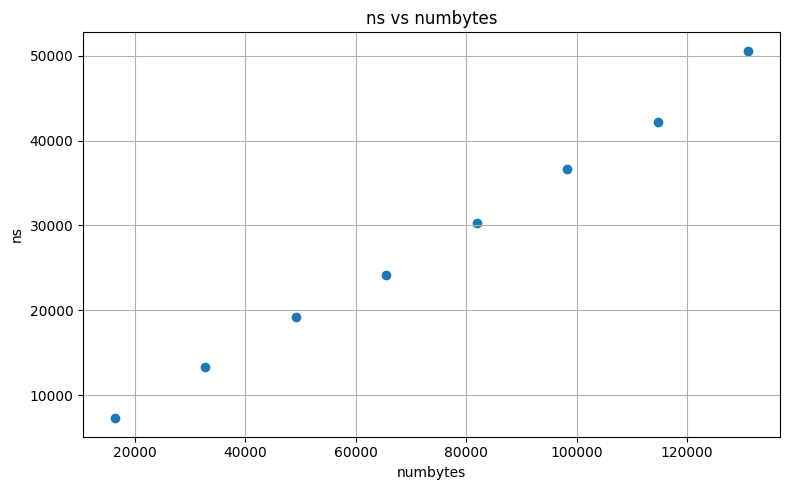

[   0.37876684 -209.22093023]
0.9939369241531356


In [6]:
beta, r2 = myfunc(df)
print(beta)
print(r2)